<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:white; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  STUDENT STRESS FACTORS
</h1>

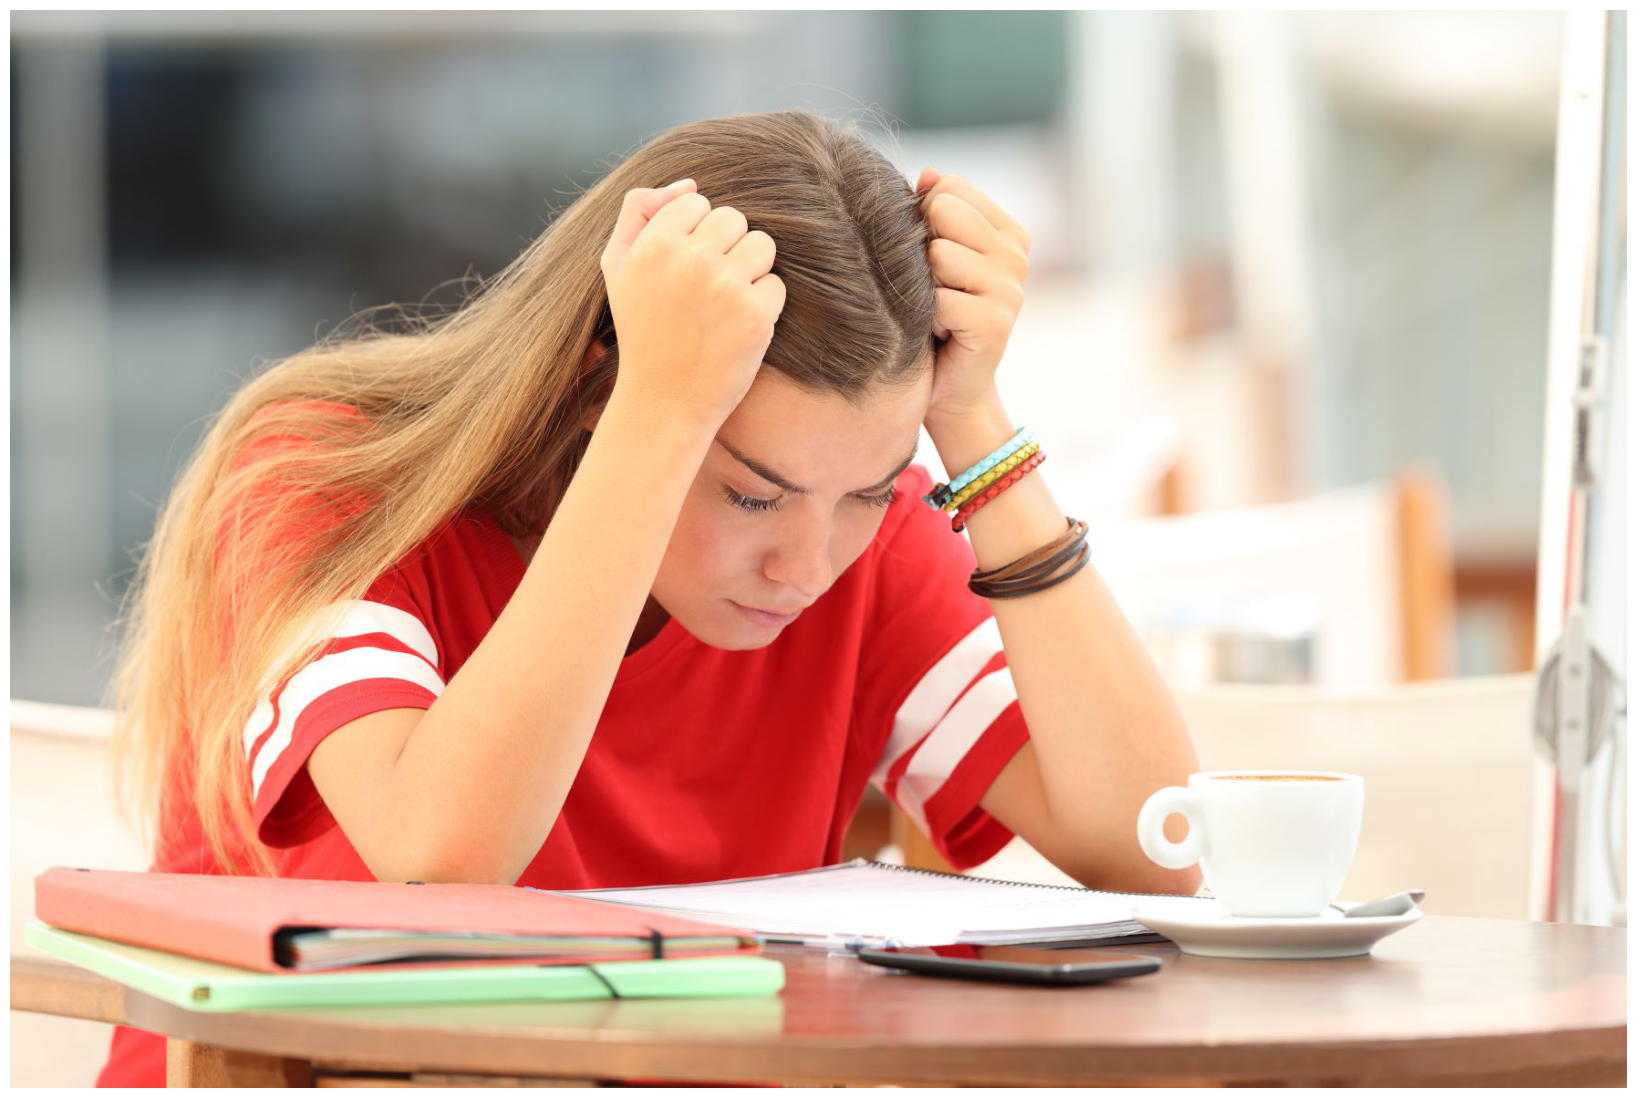

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Shuhaib\Downloads\senior-stress-survey-featured.jpg")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:RED; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  IMPORT LIBRAIES
</h1>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgbmodel 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
stress=pd.read_csv(r"C:\Users\Shuhaib\Downloads\Student Stress Factors (2).csv")

In [4]:
stress.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [5]:
stress.shape

(520, 6)

In [6]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [7]:
stress.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
stress.isnull().sum()

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64

In [9]:
stress.columns

Index(['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> univariate
</h2>

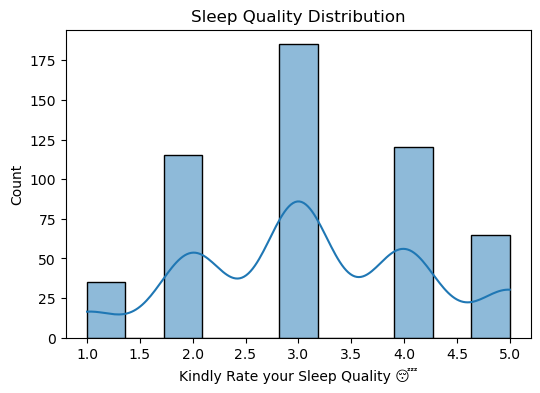

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(stress['Kindly Rate your Sleep Quality 😴'], kde=True)
plt.title("Sleep Quality Distribution")
plt.show()

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> bivariate
</h2>

C:\Users\Shuhaib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


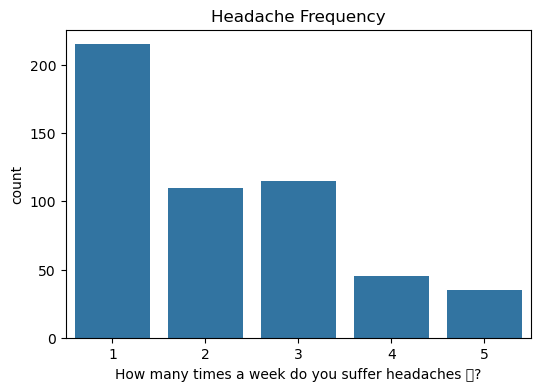

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=stress['How many times a week do you suffer headaches 🤕?'])
plt.title("Headache Frequency")
plt.show()

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> multivariate
</h2>

C:\Users\Shuhaib\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Shuhaib\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Shuhaib\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Shuhaib\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127934 (\N{TENNIS RACQUET AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Shuhaib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shuhaib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128105 (\N{WOMAN}) m

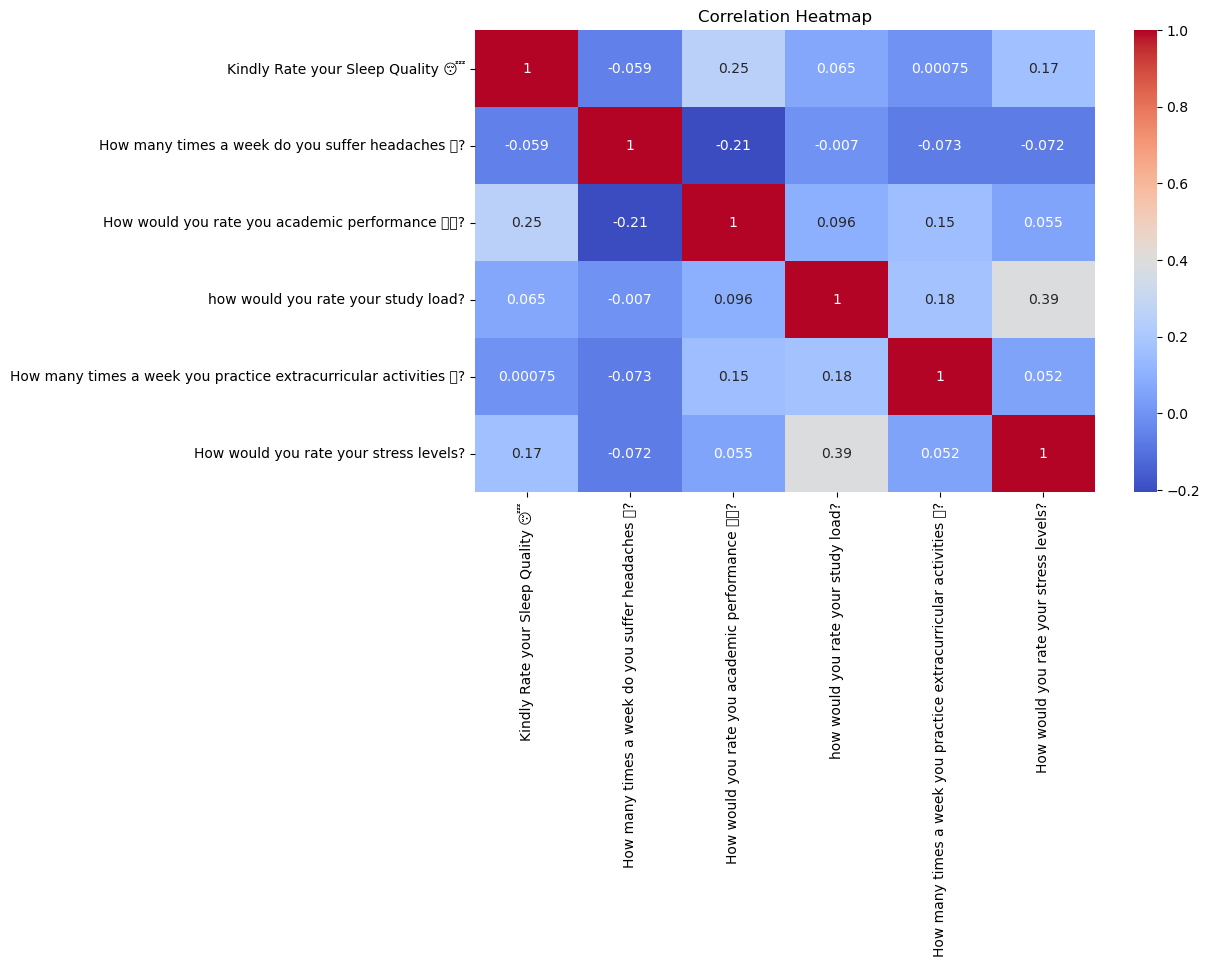

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(stress.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:red; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  SCALING
</h1>

In [13]:
scaler=MinMaxScaler()

In [14]:
scaled_data=scaler.fit_transform(stress)

In [15]:
stress=pd.DataFrame(scaled_data,columns=stress.columns)

In [16]:
stress

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,0.50,0.00,0.50,0.75,0.25,0.50
1,0.75,0.00,0.25,0.50,0.50,0.25
2,0.25,0.00,0.25,0.00,0.75,0.75
3,0.50,0.25,0.50,0.25,0.50,0.50
4,0.25,0.50,0.00,1.00,1.00,0.50
...,...,...,...,...,...,...
515,0.50,0.25,0.75,0.25,0.50,0.00
516,0.25,0.75,0.50,0.25,0.00,0.25
517,0.25,0.50,1.00,0.00,1.00,0.25
518,0.50,0.75,0.50,1.00,0.25,1.00


In [17]:

x=stress.drop('How would you rate your stress levels?',axis=1)
x

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?
0,0.50,0.00,0.50,0.75,0.25
1,0.75,0.00,0.25,0.50,0.50
2,0.25,0.00,0.25,0.00,0.75
3,0.50,0.25,0.50,0.25,0.50
4,0.25,0.50,0.00,1.00,1.00
...,...,...,...,...,...
515,0.50,0.25,0.75,0.25,0.50
516,0.25,0.75,0.50,0.25,0.00
517,0.25,0.50,1.00,0.00,1.00
518,0.50,0.75,0.50,1.00,0.25


In [18]:
y=stress['How would you rate your stress levels?']
y

0      0.50
1      0.25
2      0.75
3      0.50
4      0.50
       ... 
515    0.00
516    0.25
517    0.25
518    1.00
519    0.75
Name: How would you rate your stress levels?, Length: 520, dtype: float64

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:red; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  MODEL BUILDING
</h1>

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> RANDOM FOREST
</h2>

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
model=RandomForestRegressor(n_estimators=200,random_state=42)

In [22]:
model=model.fit(x_train,y_train)

In [23]:
y_rf=model.predict(x_test)

In [24]:
mse=mean_squared_error(y_test,y_rf)
mse

0.011564235140944068

In [25]:
r2_rf=r2_score(y_test,y_rf)
r2_rf

0.9057742701374256

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> dicision tree
</h2>

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model3= DecisionTreeRegressor(random_state=42,max_depth=5)

In [28]:
model3=model3.fit(x_train,y_train)

In [29]:
y_pred3=model3.predict(x_test)

In [30]:
mse= mean_squared_error(y_test,y_pred3)

In [31]:
mse

0.05955229293011953

In [32]:

r2_dt=r2_score(y_test,y_pred3)
r2_dt

0.5147661563484738

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> SUPPORT VECTOR MACHINE
               
</h2>

In [33]:
from sklearn.svm import SVR

In [34]:
svr_linear=SVR(kernel="linear")

In [35]:
svr_linear=svr_linear.fit(x_train,y_train)

In [36]:
y_svrl=svr_linear.predict(x_test)

In [37]:
r2_svl=r2_score(y_test,y_svrl)

In [38]:
r2_svl

0.19474857793346867

In [39]:
svr_rbf=SVR(kernel="rbf")

In [40]:
svr_rbf=svr_rbf.fit(x_train,y_train)

In [41]:
y_svrbf=svr_rbf.predict(x_test)

In [42]:
r2_svrbf=r2_score(y_test,y_svrbf)

In [43]:
r2_svrbf

0.7473555560740466

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Ridge
</h2>

In [44]:
from sklearn.linear_model import Ridge,Lasso

In [45]:
ridge = Ridge(alpha=1.0)

In [46]:
ridge=ridge.fit(x_train, y_train)

In [47]:
rid_pred= ridge.predict(x_test)

In [48]:
mse=mean_squared_error(y_test,rid_pred)
mse

0.09497317953735962

In [49]:
r2_ridge=r2_score(y_test,rid_pred)
r2_ridge

0.22615572493915415

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Lasso
</h2>

In [50]:
lasso= Lasso(alpha=0.1) 

In [51]:
lasso=lasso.fit(x_train, y_train)

In [52]:
l1_pred= lasso.predict(x_test)

In [53]:
mse=mean_squared_error(y_test,l1_pred)
mse

0.12287352071005916

In [54]:
r2_l1=r2_score(y_test,l1_pred)
r2_l1

-0.0011770799001835641

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Knn
</h2>

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
metric_k=[]
neighbors=np.arange(3,15)

In [57]:
for k in neighbors:
    Regressor=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    Regressor.fit(x_train,y_train)
    y_prediction=Regressor.predict(x_test)
    r2=r2_score(y_test,y_prediction)
    metric_k.append(r2)

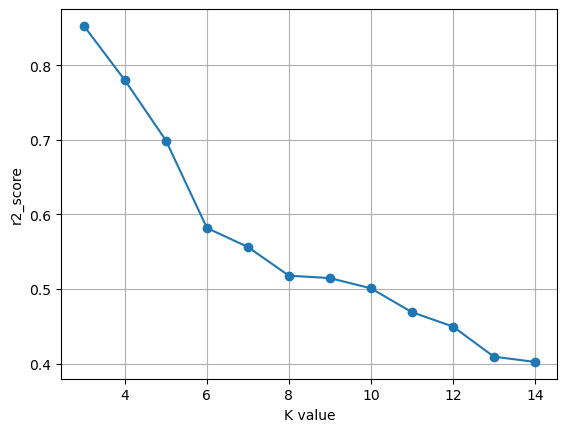

In [58]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('r2_score')
plt.grid()
plt.show()


In [59]:
Regressor=KNeighborsRegressor(n_neighbors=2,metric='euclidean')
knn=Regressor.fit(x_train,y_train)
y_prediction=Regressor.predict(x_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
KNN_r2=r2_score(y_test,y_prediction)
KNN_r2

0.9057394415932953

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Xgboost
</h2>

In [62]:
from xgboost import XGBRegressor

In [63]:
model_xgb=XGBRegressor()

In [99]:
model_xgb=model_xgb.fit(x_train,y_train)

In [65]:
y_xgb=model_xgb.predict(x_test)

In [66]:
r2_xgb=r2_score(y_test,y_xgb)
r2_xgb

0.9108549113085861

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Catboost
</h2>

In [67]:
from catboost import CatBoostRegressor

In [68]:
model_cat=CatBoostRegressor(verbose=0)

In [69]:
model_cat=model_cat.fit(x_train,y_train)

In [70]:
y_cat=model_cat.predict(x_test)

In [71]:
r2_cat=r2_score(y_test,y_cat)
r2_cat

0.9106160636924225

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Lightgbm
</h2>

In [72]:
import lightgbm as lgbmodel 

In [73]:
model_lgb=lgbmodel.LGBMRegressor(verbose=-1)

In [74]:
model_lgb=model_lgb.fit(x_train,y_train)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [75]:
y_lgb=model_lgb.predict(x_test)

In [76]:
r2_lgb=r2_score(y_test,y_lgb)
r2_lgb

0.7995904080039987

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Gradientboost
</h2>

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
model5_gdb=GradientBoostingRegressor(verbose=0) 

In [79]:
model5_gdb=model5_gdb.fit(x_train,y_train)

In [80]:
y_gdb=model5_gdb.predict(x_test)

In [81]:
r2gdb=r2_score(y_test,y_gdb)
r2gdb

0.7366405763045305

<h2 style="background-color:lightcoral; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Tabulate
</h2>

In [82]:
from tabulate import tabulate
table=[["Model","r2_rf"],["Logistic Regression",r2_rf],
       ["Random Forest",r2_rf],["Decision Tree",r2_dt],
       ["Ridge",r2_ridge],["Lasso",r2_l1],
       ["SVC[linear]",r2_svl],["SVC[rbf]",r2_svrbf],
       ["KNN",KNN_r2],["XG boost",r2_xgb],
       ["Cat boost",r2_cat],["LIGHT GBM",r2_lgb]]
print(tabulate(table,headers="firstrow",tablefmt="fancy_grid"))


╒═════════════════════╤═════════════╕
│ Model               │       r2_rf │
╞═════════════════════╪═════════════╡
│ Logistic Regression │  0.905774   │
├─────────────────────┼─────────────┤
│ Random Forest       │  0.905774   │
├─────────────────────┼─────────────┤
│ Decision Tree       │  0.514766   │
├─────────────────────┼─────────────┤
│ Ridge               │  0.226156   │
├─────────────────────┼─────────────┤
│ Lasso               │ -0.00117708 │
├─────────────────────┼─────────────┤
│ SVC[linear]         │  0.194749   │
├─────────────────────┼─────────────┤
│ SVC[rbf]            │  0.747356   │
├─────────────────────┼─────────────┤
│ KNN                 │  0.905739   │
├─────────────────────┼─────────────┤
│ XG boost            │  0.910855   │
├─────────────────────┼─────────────┤
│ Cat boost           │  0.910616   │
├─────────────────────┼─────────────┤
│ LIGHT GBM           │  0.79959    │
╘═════════════════════╧═════════════╛


<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:red; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  HYPERPERAMETER TUNING
</h1>

In [83]:
from sklearn.model_selection import RandomizedSearchCV 

In [84]:
model_xgb=XGBRegressor()

In [85]:
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

In [86]:
clf=RandomizedSearchCV(model_xgb,param_dist,cv=3, scoring='r2', n_jobs=-1)
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0.5, 1.0, 1.5, 2.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='r2')

In [87]:
print("Best Parameters:", clf.best_params_)
print("Best R2 Score:", clf.best_score_)

Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best R2 Score: 0.5862175029913915


In [88]:
print("Test r2_score:", clf.score(x_test, y_test))

Test r2_score: 0.7164813781734998


In [89]:
from xgboost import XGBRegressor

model = XGBRegressor(
    subsample=0.8,
    reg_lambda=1.5,
    reg_alpha=1.5,
    n_estimators=150,
    max_depth=7,
    learning_rate=0.15,
    gamma=0,
    colsample_bytree=0.8
)


In [90]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.15, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [91]:
y_xgb2=model.predict(x_test)

In [92]:
r2_xgb2=r2_score(y_test,y_xgb2)

In [93]:
r2_xgb2

0.7639916086655449

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:white; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  METRICS
</h1>

In [94]:
from sklearn.metrics import mean_absolute_error

In [95]:
mae=mean_absolute_error(y_test,y_xgb)
mae

0.03327581571375049

In [96]:
rmse=np.sqrt(mse)
rmse

np.float64(0.35053319487611895)

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:white; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  PREDICTION
</h1>

In [100]:
new_data=[[0.50,0.00,0.50,0.75,0.25]]

In [101]:
prde=model_xgb.predict(new_data)
prde

array([0.50121367], dtype=float32)